<div style="font-size: 14;color:red;font-size:25PX;font-family: arial;" align ="rigth" dir="rtl">
<b>
<p>
کانسپت کلی کار
</p>
<p>
تمام داده های ورودی و کوره و سرباره را بر اساس شماره ذوب و تاریخ تجمیع می کنیم و نقاطی را که داده نداریم فرض می کنیم بین دو برداشت اطلاعات ثابت بوده است
</p>
<p>
داده های تجمیع شده را کلاسه بندی می کنیم و لیبل می زنیم این لیبل تارگت تمام مدل های بعدی خواهد بود
</p>
</b>
</div>

<div style="font-size: 14;color:red;font-size:25PX;font-family: arial;" align ="rigth" dir="rtl">
<b>
1- فراخوان توابع و کتابخانه های مورد نیاز
</b>
</div>

In [3]:
import os
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
import pickle
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.gridspec import GridSpec
import seaborn as sns
from scipy.stats import gaussian_kde
#working_dir = os.getcwd()
working_dir ='..'  # Use on Jupyter Notebook

<div style="font-size: 14;color:red;font-size:25PX;font-family: arial;" align ="rigth" dir="rtl">
<b>
2- تجمیع تمام داده ها و پرکردن میسینگ دیتا
</b>
</div>

In [5]:
df = pd.read_csv(f"{working_dir}/data/eaf_data.csv")
df.set_index(keys='Heat', inplace=True ,drop=True)
root_df = pd.DataFrame(data=df['tar (EAF)'])
print(f'EAF Dataset Rows: {root_df.shape}')
del df
#---------------Add Coke 1030 Labels------------
df = pd.read_csv(f"{working_dir}/data/coke_1030.csv")
results = pd.merge(left=root_df,right=df,left_on='tar (EAF)',right_on='tar',how='left').drop(labels=['tar'],axis=1)
results.set_index(keys=root_df.index, inplace=True ,drop=True)
root_df = results.copy()
del df,results
#---------------Add Coke Fine Labels------------
df = pd.read_csv(f"{working_dir}/data/coke_fine.csv")
results = pd.merge(left=root_df,right=df,left_on='tar (EAF)',right_on='tar',how='left').drop(labels=['tar'],axis=1)
results.set_index(keys=root_df.index, inplace=True ,drop=True)
root_df = results.copy()
del df,results
#---------------Add dolomite Labels------------
df = pd.read_csv(f"{working_dir}/data/dolo.csv")
results = pd.merge(left=root_df,right=df,left_on='tar (EAF)',right_on='tar',how='left').drop(labels=['tar'],axis=1)
results.set_index(keys=root_df.index, inplace=True ,drop=True)
root_df = results.copy()
del df,results
#---------------Add dri Labels------------
df = pd.read_csv(f"{working_dir}/data/dri.csv")
results = pd.merge(left=root_df,right=df,left_on='tar (EAF)',right_on='tar',how='left').drop(labels=['tar'],axis=1)
results.set_index(keys=root_df.index, inplace=True ,drop=True)
root_df = results.copy()
del df,results
#---------------Add lime Labels------------
df = pd.read_csv(f"{working_dir}/data/lime.csv")
results = pd.merge(left=root_df,right=df,left_on='tar (EAF)',right_on='tar',how='left').drop(labels=['tar'],axis=1)
results.set_index(keys=root_df.index, inplace=True ,drop=True)
root_df = results.copy()
del df,results
#---------------Add slag Labels------------
df = pd.read_csv(f"{working_dir}/data/slag.csv")
results = pd.merge(left=root_df,right=df,left_index=True,right_on='heat_no',how='left')
results.drop(labels=['heat_no','tar (Slag)'] ,axis=1,inplace=True)
results.set_index(keys=root_df.index, inplace=True ,drop=True)
root_df = results.copy()
del df,results
#---------------Add EAF Data------------
df = pd.read_csv(f"{working_dir}/data/eaf_data.csv")
df.drop(labels=['tar (EAF)'] ,axis=1,inplace=True)
results = pd.merge(left=root_df,right=df,left_index=True,right_on='Heat',how='left')
results.drop(labels=['Heat','tar (EAF)'] ,axis=1,inplace=True)
results.set_index(keys=root_df.index, inplace=True ,drop=True)
root_df = results.copy()
del df,results
root_df = root_df.ffill()
print(f'Final Shape of Dataset: {root_df.shape}')
print(root_df.info())
root_df.to_csv(f"{working_dir}/data/eaf_and_all_data(total).csv",index=True)
del root_df



EAF Dataset Rows: (3317, 1)
Final Shape of Dataset: (3317, 38)
<class 'pandas.core.frame.DataFrame'>
Index: 3317 entries, 4024675.0 to 4034594.0
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   c (Coke1030)      3317 non-null   float64
 1   s (Coke1030)      3317 non-null   float64
 2   s112 (Coke1030)   3317 non-null   float64
 3   c (CokeFine)      3317 non-null   float64
 4   s (CokeFine)      3317 non-null   float64
 5   s05 (CokeFine)    3317 non-null   float64
 6   cao (Dolomite)    3317 non-null   float64
 7   mgo (Dolomite)    3317 non-null   float64
 8   s0_95 (Dolomite)  3317 non-null   float64
 9   fe_metal (DRI)    3317 non-null   float64
 10  fe_total (DRI)    3317 non-null   float64
 11  md (DRI)          3317 non-null   float64
 12  c (DRI)           3317 non-null   float64
 13  gunge (DRI)       3317 non-null   float64
 14  feo (DRI)         3317 non-null   float64
 15  cao (Lime)        

<div style="font-size: 14;color:red;font-size:25PX;font-family: arial;" align ="rigth" dir="rtl">
<b>
3- خوشه بندی کلیه داده ها و لیبلینگ کلی 
</b>
</div>

(3317, 38)
(3317, 38)
           0          1
0   md (DRI)  feo (DRI)
1  b2 (Slag)  b3 (Slag)
(3317, 2)
(3317,)


C:\Users\h.alavi.CMIC\AppData\Local\Temp\ipykernel_5356\2998190476.py:34: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.scatterplot(


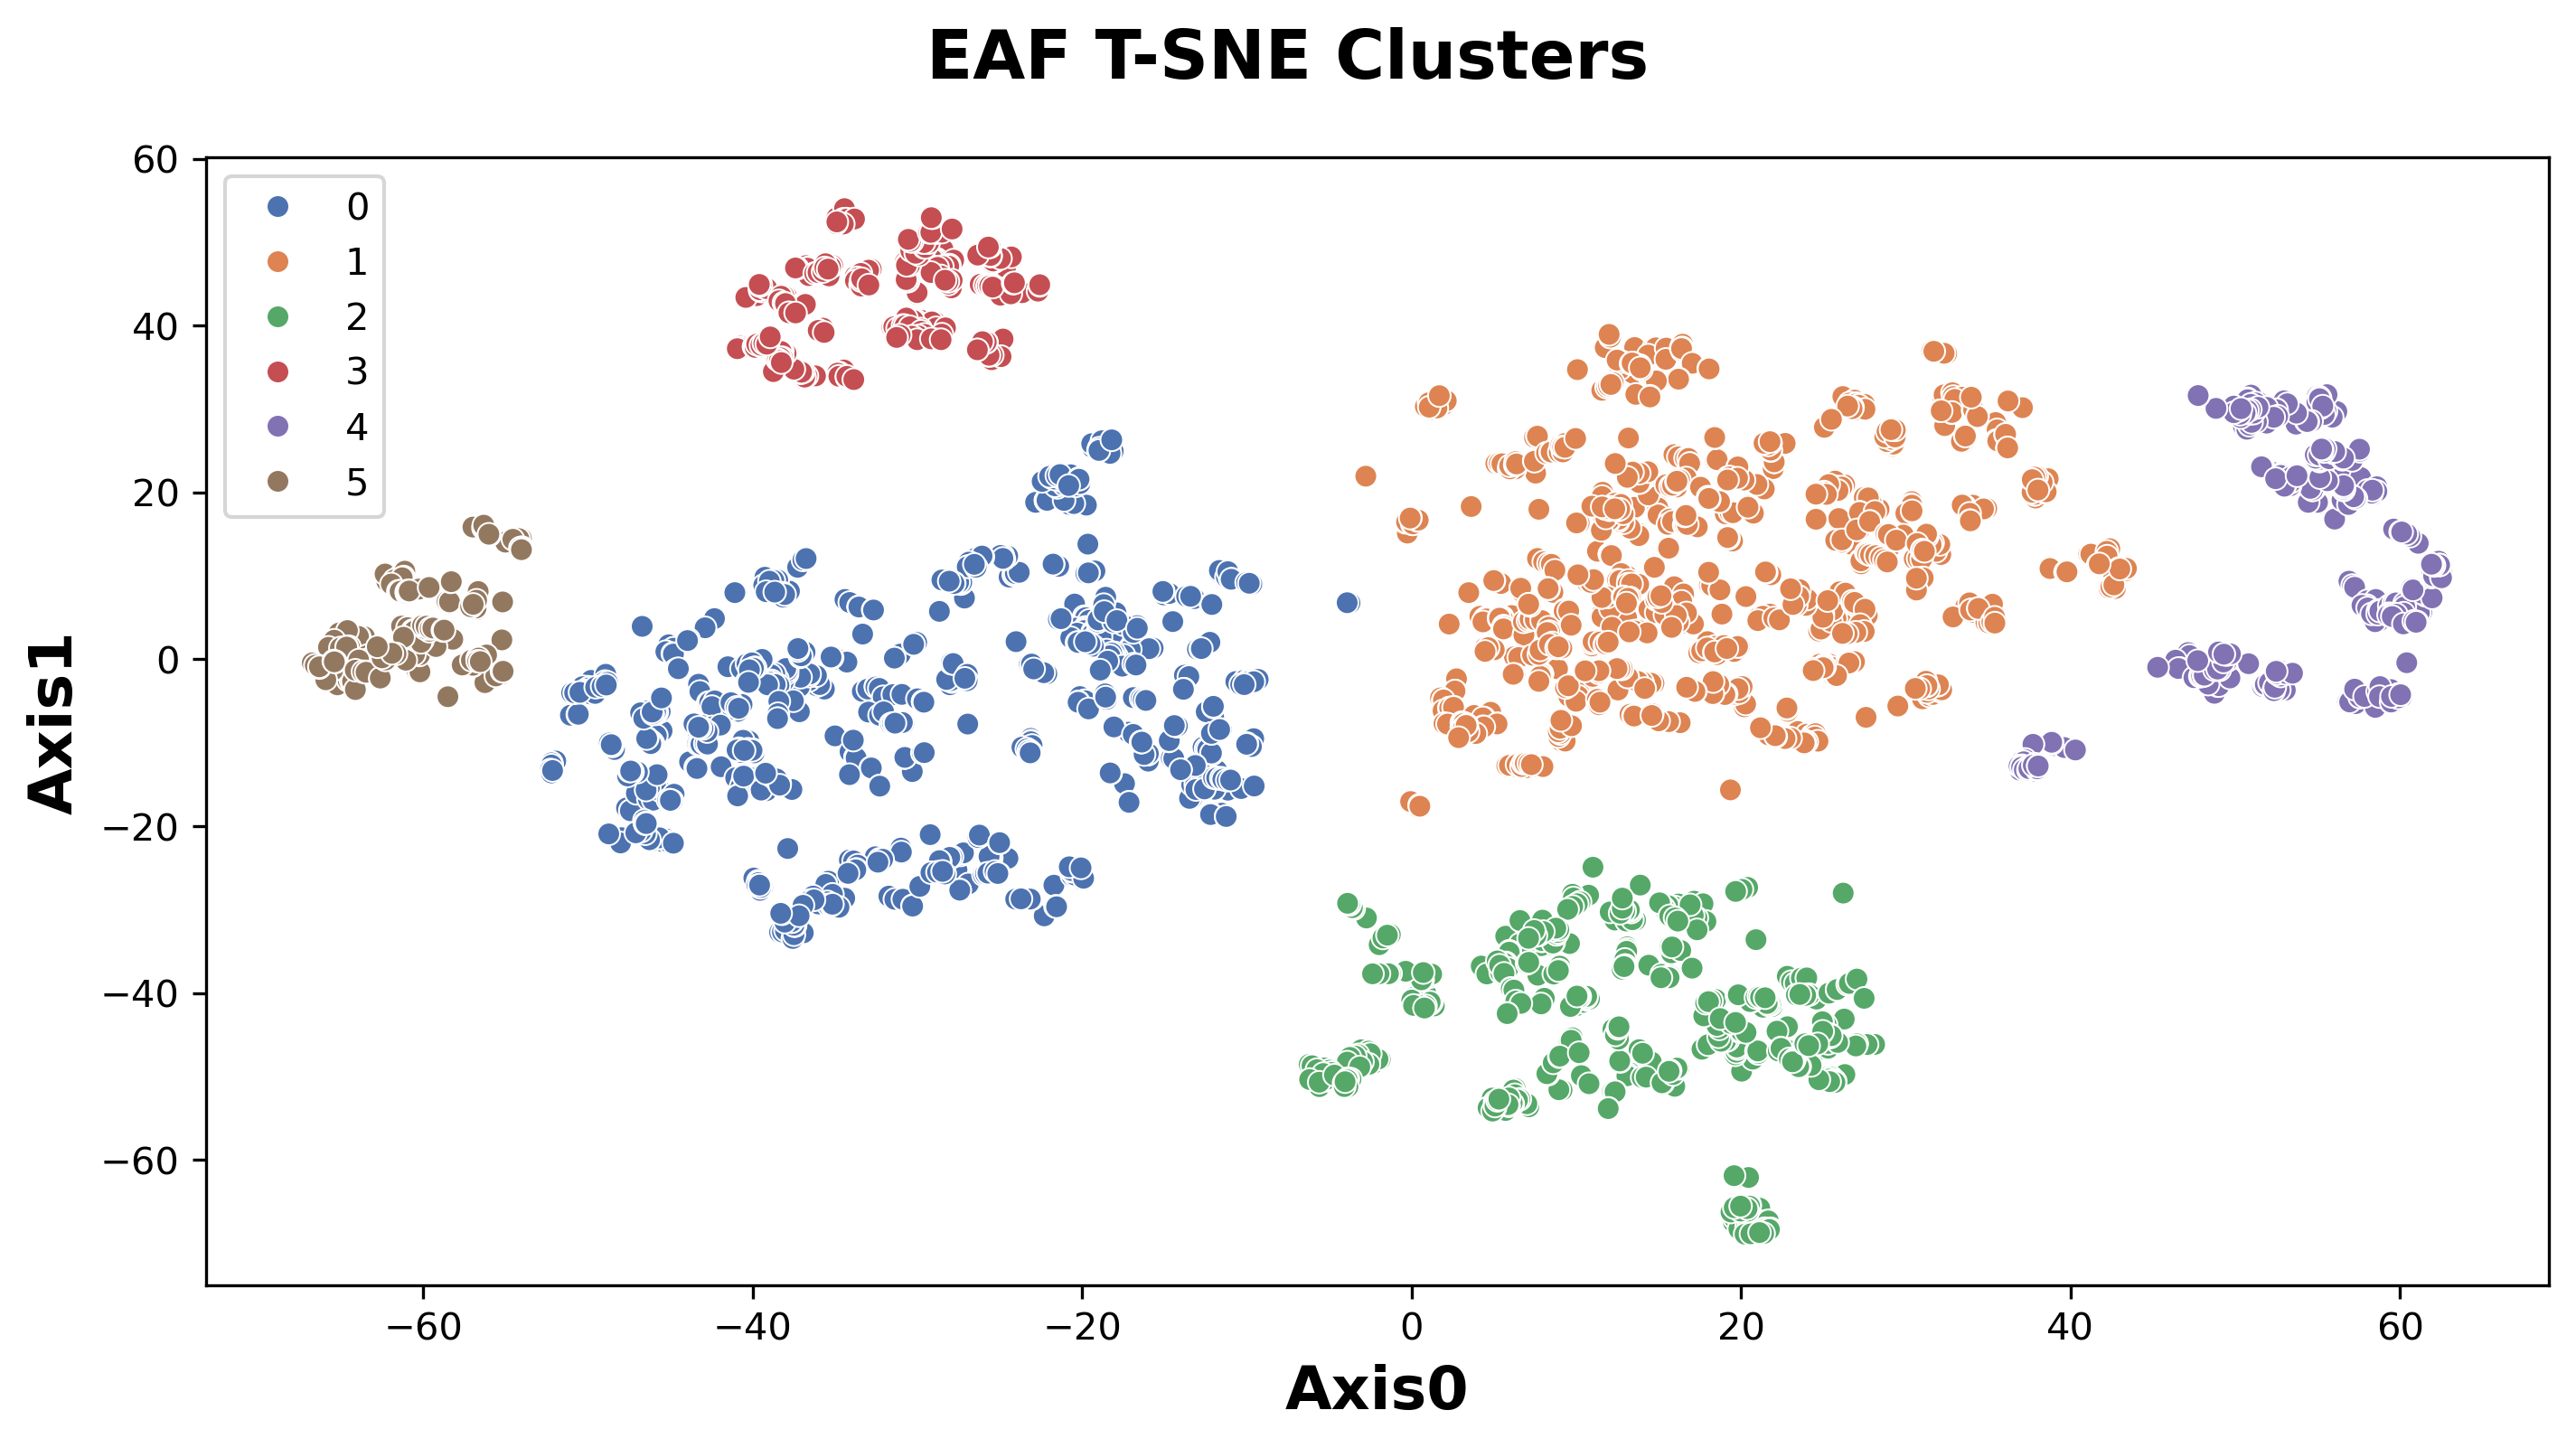

(3317, 39)
Index(['c (Coke1030)', 's (Coke1030)', 's112 (Coke1030)', 'c (CokeFine)',
       's (CokeFine)', 's05 (CokeFine)', 'cao (Dolomite)', 'mgo (Dolomite)',
       's0_95 (Dolomite)', 'fe_metal (DRI)', 'fe_total (DRI)', 'md (DRI)',
       'c (DRI)', 'gunge (DRI)', 'feo (DRI)', 'cao (Lime)', 'mgo (Lime)',
       's0_95 (Lime)', 'cao (Slag)', 'feo (Slag)', 'sio2 (Slag)', 'mgo (Slag)',
       'al2o3 (Slag)', 'p2o5 (Slag)', 'mno (Slag)', 'b2 (Slag)', 'b3 (Slag)',
       'b4 (Slag)', 'Power On (EAF)', 'Power Off (EAF)', 'Ele [MW] (EAF)',
       'Tapped [t] (EAF)', 'O2 [Nm3] (EAF)', 'CH4 [Nm3] (EAF)',
       'C.inj [kg] (EAF)', 'C [kg] (EAF)', 'CaO [kg] (EAF)', 'MgO [kg] (EAF)'],
      dtype='object')


C:\Users\h.alavi.CMIC\AppData\Local\Temp\ipykernel_5356\2998190476.py:63: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.kdeplot(
C:\Users\h.alavi.CMIC\AppData\Local\Temp\ipykernel_5356\2998190476.py:63: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.kdeplot(
C:\Users\h.alavi.CMIC\AppData\Local\Temp\ipykernel_5356\2998190476.py:63: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.kdeplot(
C:\Users\h.alavi.CMIC\AppData\Local\Temp\ipykernel_5356\2998190476.py:63: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.kdeplot(
C:\Users\h.alavi.CMIC\AppData\Local\Temp\ipykernel_5356\2998190476.py:63: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.kdeplot(
C:\Users\h.alavi.CMIC\AppData\Local\Temp\ipykernel_5356\2998190476.py:63: UserWa

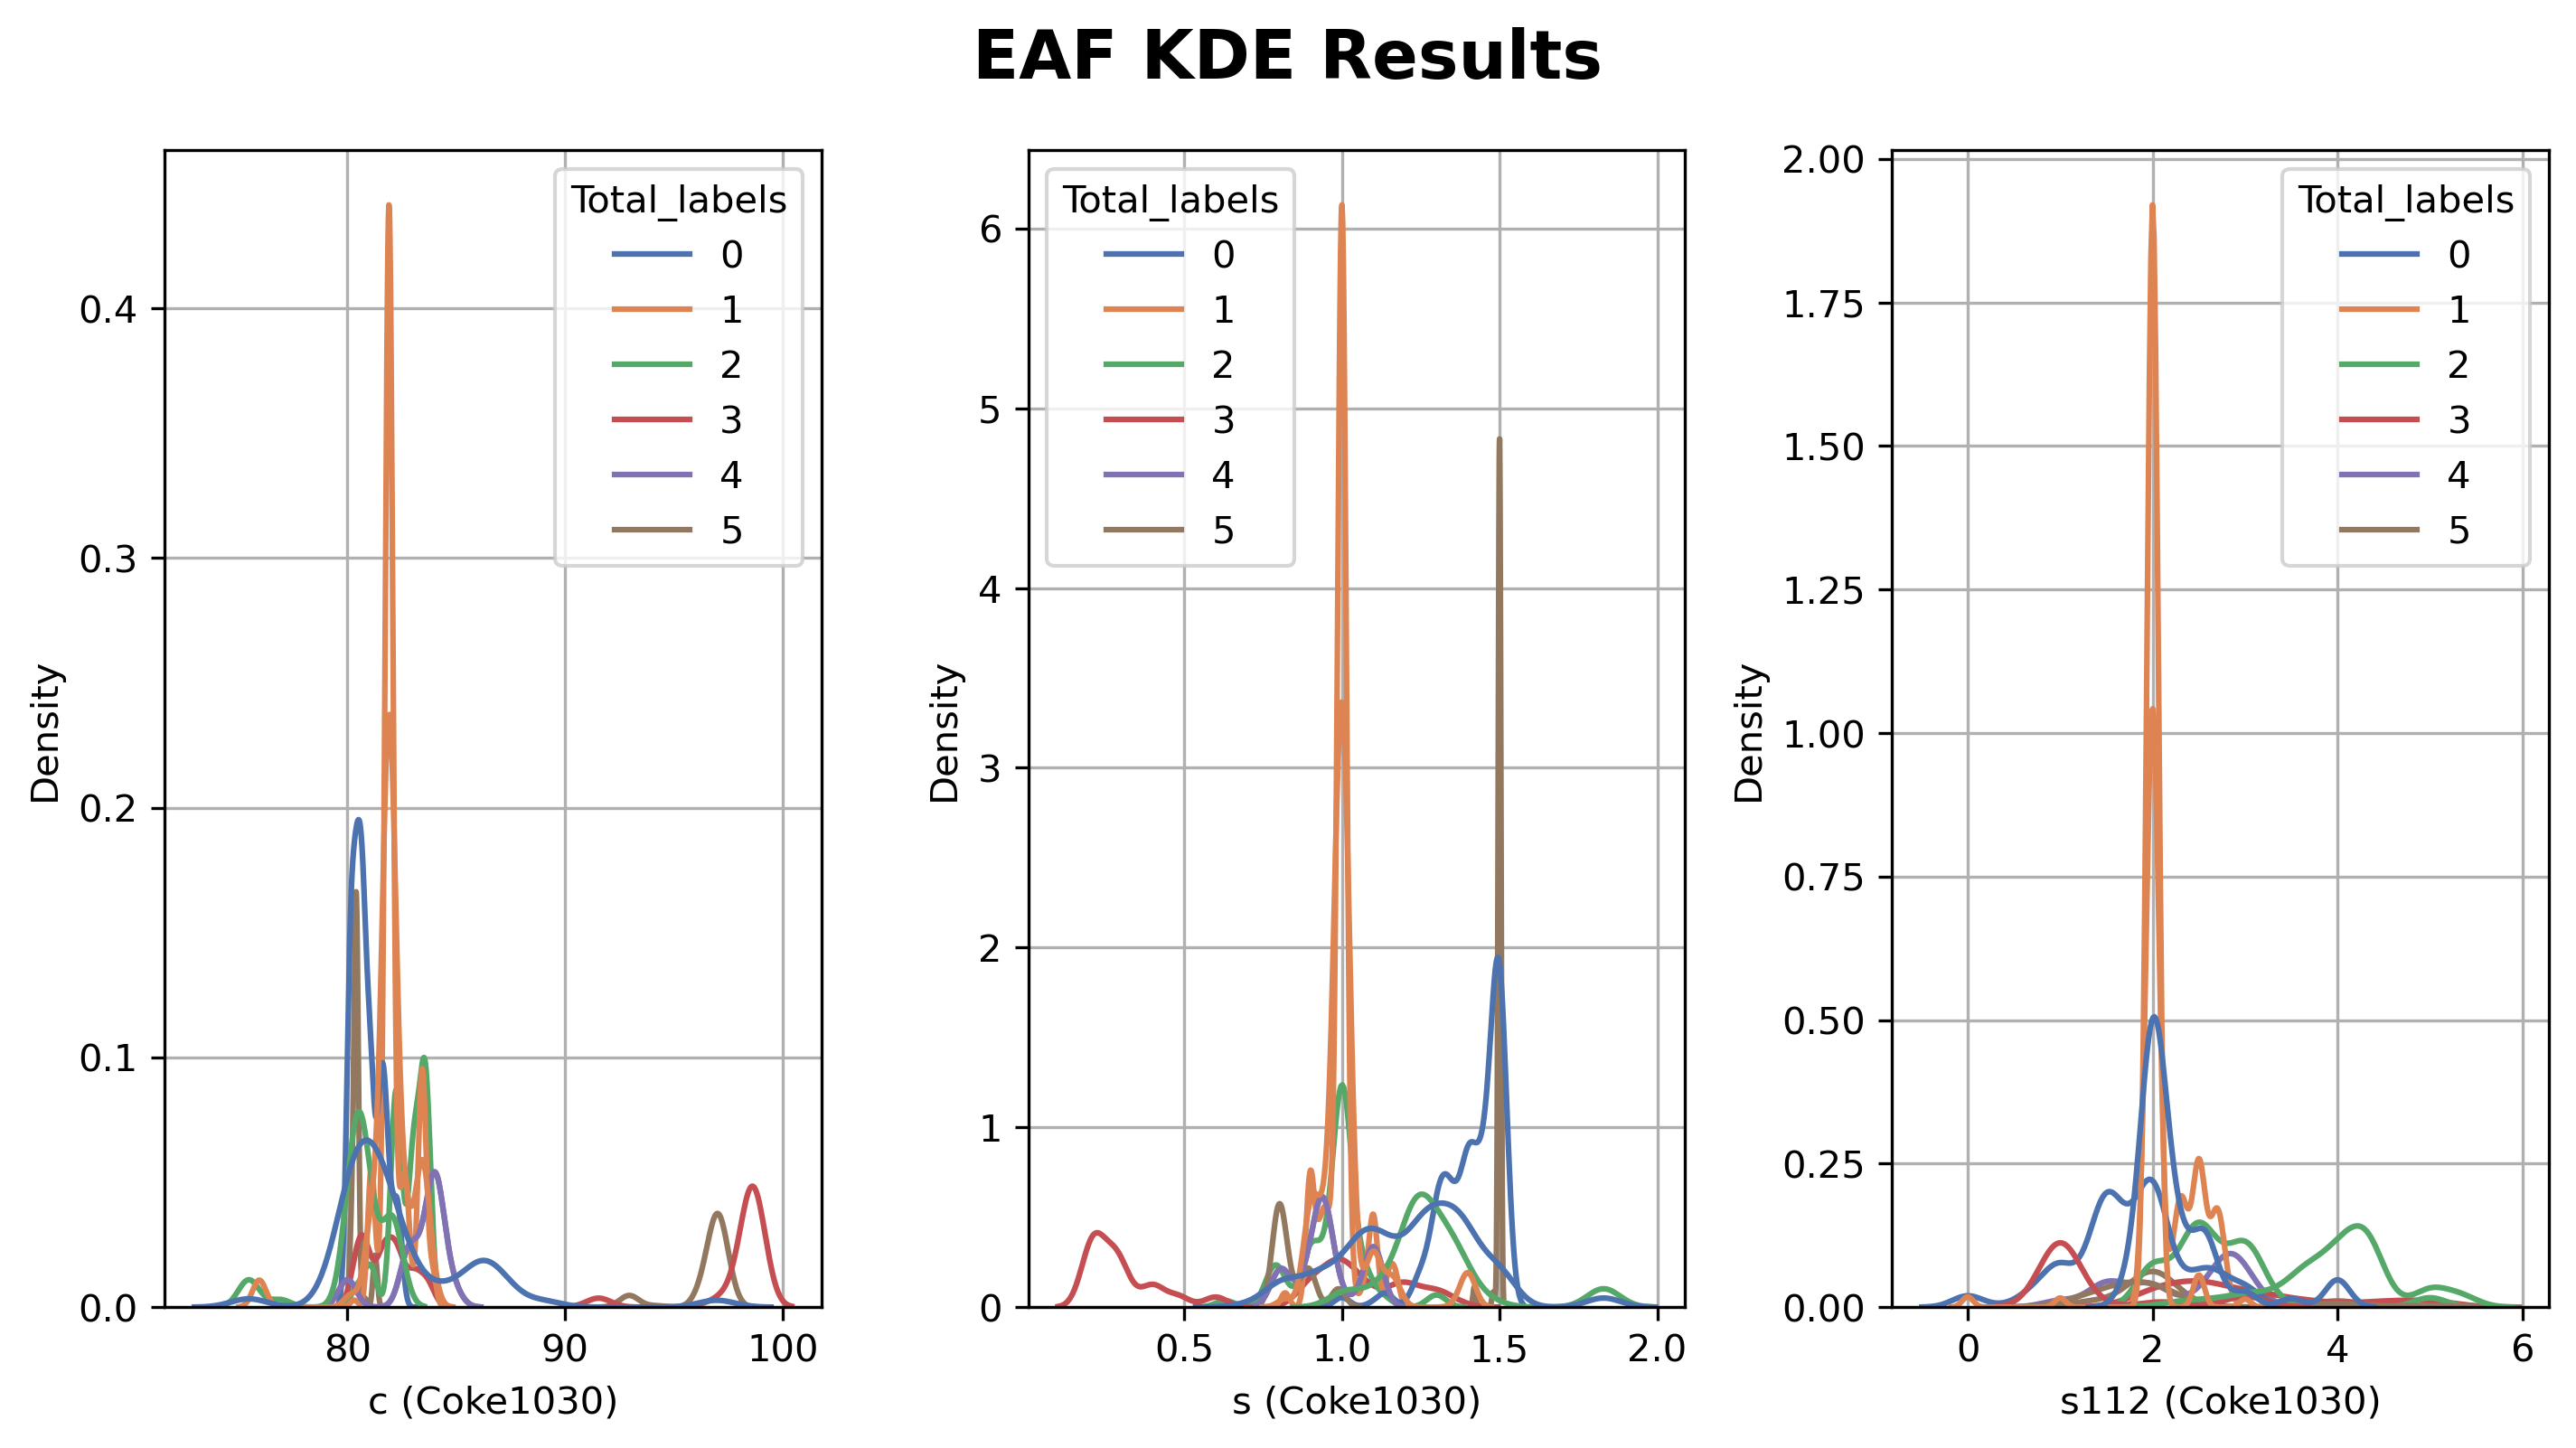

(3317, 2)


C:\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.5.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [15]:
df = pd.read_csv(f"{working_dir}/data/eaf_and_all_data(total).csv")
df.set_index(keys='Heat', inplace=True ,drop=True)
print(df.shape)
#--------Normalizing-------- 
scale = MinMaxScaler()
normal_df = pd.DataFrame(data = scale.fit_transform(df) , columns= df.columns)
print(normal_df.shape)
#--------Correlation--------
corr_df = normal_df.corr().abs()
corr_df = corr_df.where(np.triu(np.ones(corr_df.shape),k= 1).astype(bool)) #paiine matice motegharen ast ve hazf shod
high_corr_columns_name = pd.DataFrame(corr_df.ge(.95).stack().loc[lambda corr_df: corr_df].index.to_list())
print(high_corr_columns_name)
#df.drop(labels=['s315'] ,axis=1,inplace=True)
#-------Clustering---------
scale = MinMaxScaler()
normal_df = pd.DataFrame(data = scale.fit_transform(df) , columns= df.columns)
t_sne = TSNE(n_components=2, learning_rate='auto',random_state=0,
                  init='random', perplexity=50)
data=t_sne.fit_transform(normal_df)
sne_column_name = [f"SNE{column}"  for column in range(2) ]
sne_df = pd.DataFrame(data=data,columns=sne_column_name)
print(sne_df.shape)
model = AgglomerativeClustering(n_clusters = 6, metric= 'euclidean', linkage ='average')
model.fit(sne_df)
print(model.labels_.shape)
# ---------PLOT-------------
fig = plt.figure(figsize=(9.6,5.4),dpi=300)
fig.suptitle('EAF T-SNE Clusters', fontsize=18,fontweight='bold')
ax1 = fig.subplots(1,1)
ax1.set_xlabel('Axis0', fontsize=16,fontweight='bold')
ax1.set_ylabel('Axis1', fontsize=16,fontweight='bold')
#ax1.xaxis.set_major_locator(ticker.MultipleLocator(0.01))
cmap = sns.color_palette("deep", as_cmap=True)
sns.scatterplot(
    data=sne_df,
    x='SNE0',
    y='SNE1',
    hue=model.labels_,
    palette= cmap,
    )
fig.tight_layout()
plt.savefig(f'{working_dir}/presentation/eaf-tsne-clusters.jpg')
plt.show()
#----------Labeling---------
clust_lable_dict = {0:0,1:1,2:2,3:3,4:4,5:5,6:6,7:7}
labels = [clust_lable_dict[i] for i in model.labels_]
df["Total_labels"] = labels
print(df.shape)
#----------Labes Conditions-----
plot_name = df.columns.drop(['Total_labels'])
print(plot_name)
num = 0
for k in range(1):
    fig = plt.figure(num=k,figsize=(9.6,5.4),dpi=300)
    fig.suptitle('EAF KDE Results', fontsize=18,fontweight='bold')
    ax = fig.subplots(1,3)
    #sns.set_style("ticks",{'axes.grid' : True})
    for i in range(2):
        for j in range(3):
            if num == len(plot_name):
                break
            ax[j].grid(True)
            sns.kdeplot(
                data=df,
                x=plot_name[num],
                hue="Total_labels",
                #hue_order=[0,2,3,],
                fill=False,
                #alpha = 0.4,
                palette= cmap,
                ax=ax[j],
            )
            num = num +1
    fig.tight_layout()
#ax[0].xaxis.set_major_locator(ticker.MultipleLocator(5))
#ax[0].axvline(55.1,color=cmap[0])
#ax[0].text(54.5, 0.1, '55.1', rotation=90, va='center')
#ax[1].axvline(34,color=cmap[0])
#ax[1].text(33.7, 0.1, '34', rotation=90, va='center')
#ax[2].axvline(3.1,color=cmap[0])
#ax[2].text(2.8, 0.1, '3.1', rotation=90, va='center')
#ax[2].axvline(1.7,color=cmap[1])
#ax[2].text(1.2, 0.2, '1.7', rotation=90, va='center')
#plt.savefig(f'{working_dir}/presentation/dolomite-kde-results.jpg')
plt.show()
#-------------Add Label For Slag by prediction In Feo Mgo IsoThermal B3 = 1.5-------------------

X=df[['feo (Slag)','mgo (Slag)']].values
print(X.shape)

#--------load trained model and predict-----------
clf = pickle.load(open(f"{working_dir}/trained_models/feo-mgo-isothermal.pkl", 'rb'))
predict_label = clf.predict(X)

df['Slag_labels'] = predict_label

# save For next use
df.to_csv(f"{working_dir}/data/all_data_with_labels.csv",index=True)
del df,normal_df,corr_df,high_corr_columns_name

<div style="font-size: 14;color:red;font-size:25PX;font-family: arial;" align ="rigth" dir="rtl">
<b>
4- مدلسازی و آموزش مدل
</b>
</div>

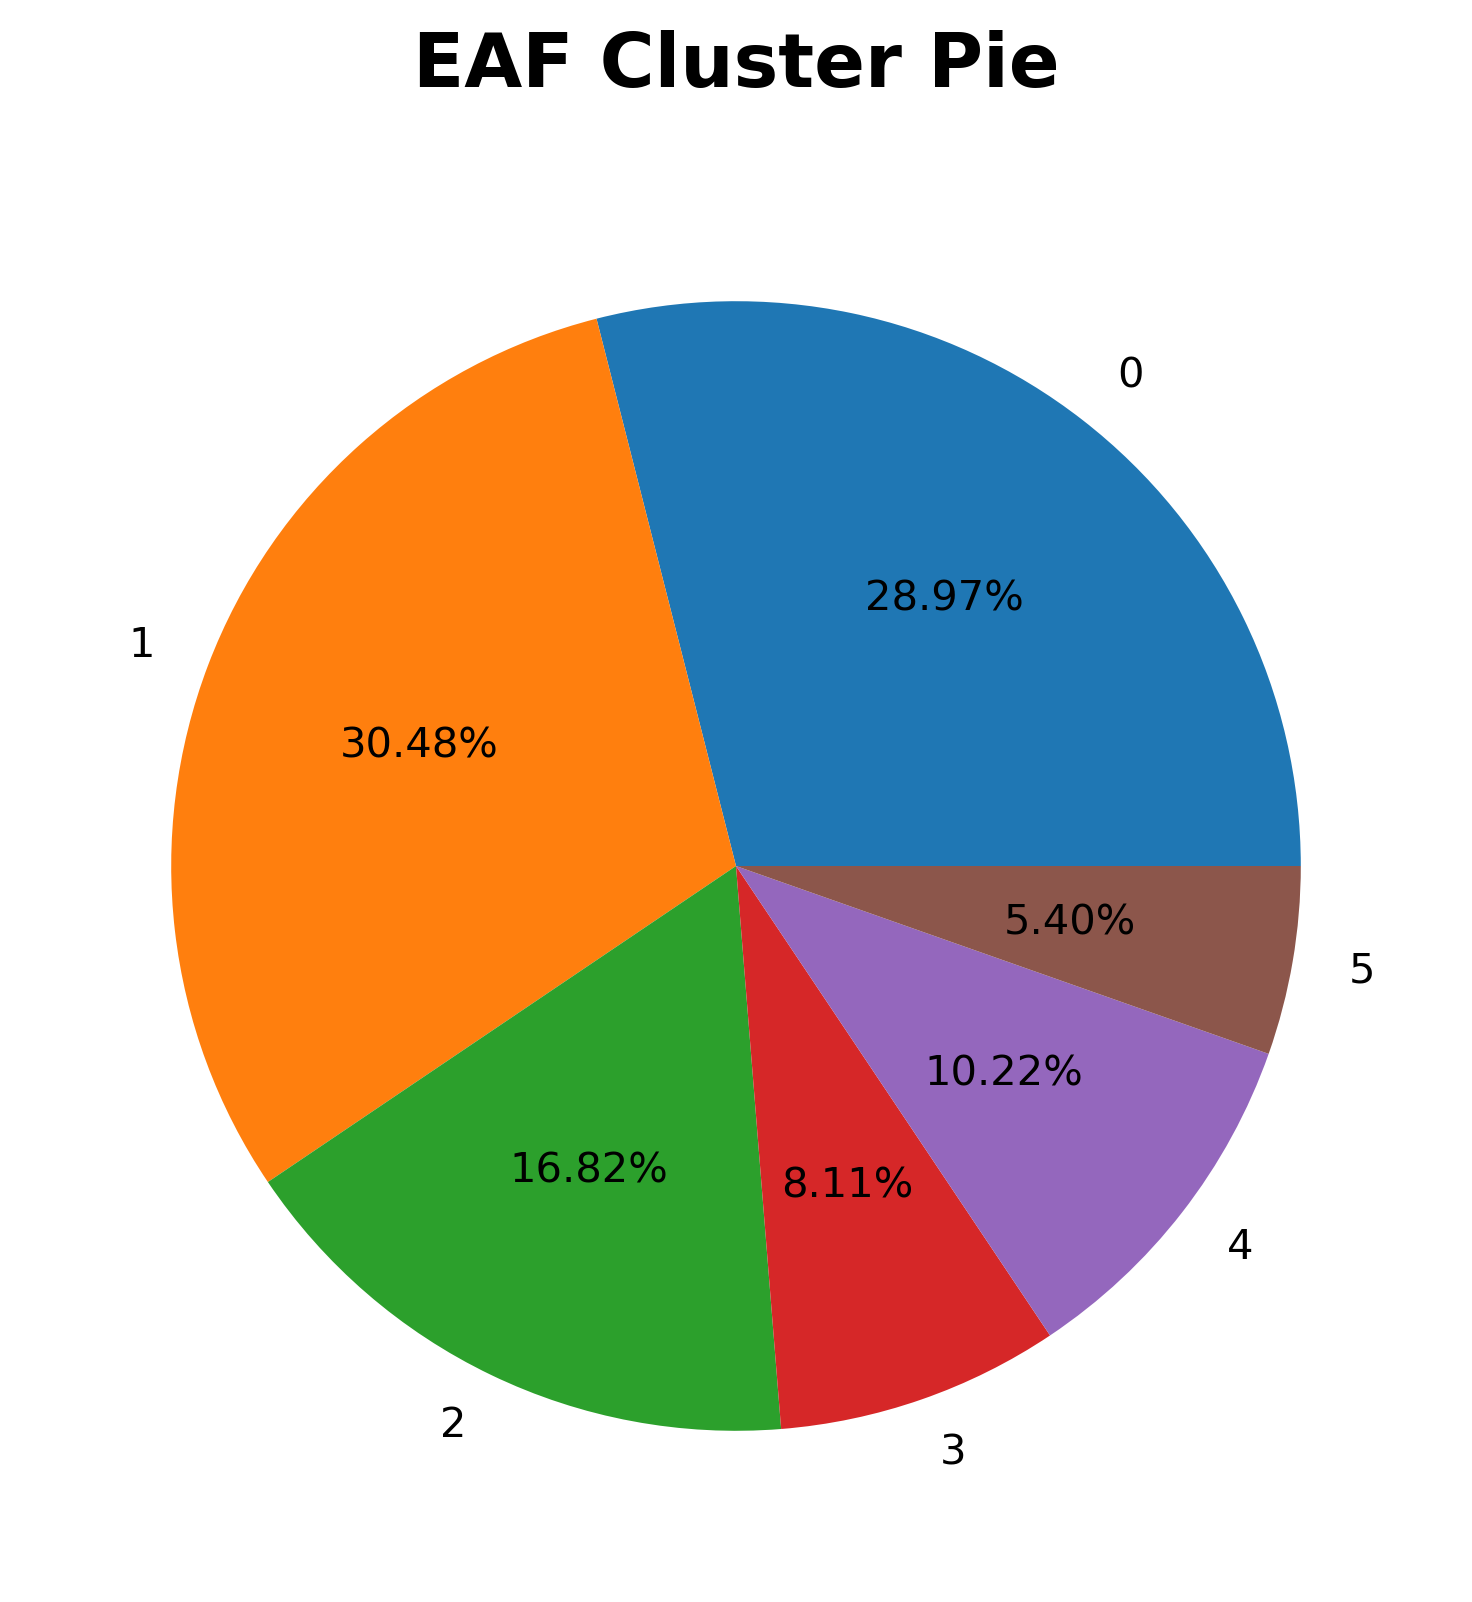

Index(['c (Coke1030)', 's (Coke1030)', 's112 (Coke1030)', 'c (CokeFine)',
       's (CokeFine)', 's05 (CokeFine)', 'cao (Dolomite)', 'mgo (Dolomite)',
       's0_95 (Dolomite)', 'fe_metal (DRI)', 'fe_total (DRI)', 'md (DRI)',
       'c (DRI)', 'gunge (DRI)', 'feo (DRI)', 'cao (Lime)', 'mgo (Lime)',
       's0_95 (Lime)'],
      dtype='object')
(2653, 18) (3317,)
Accuracy: 0.9954819277108434


In [9]:
df = pd.read_csv(f"{working_dir}/data/all_data_with_labels.csv")
#-----------------Pie Plot -------------------------
fig = plt.figure(figsize=(9.6,5.4),dpi=300)
fig.suptitle('EAF Cluster Pie', fontsize=18,fontweight='bold')
ax1 = fig.subplots(1,1)
ax1.pie(
    x=df.groupby("Total_labels")['Total_labels'].count(),
    autopct = '%.2f%%',
    textprops={'fontsize': 10},
    labels=df.groupby("Total_labels")['Total_labels'].count().index,
    )
fig.tight_layout()
plt.savefig(f'{working_dir}/presentation/eaf-clusters-pie.jpg')
plt.show()
fig.clear()
#----------------End Of Plot
mask = df.columns.str.contains('Coke1030|CokeFine|Dolomite|DRI|Lime')
print(df.columns[mask])
X=df[df.columns[mask]].values
y = df[['Total_labels']].values.ravel()
#---------------Make Train and Test Set----------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y.shape)
#---------------Make Random Forest Classifier----------------
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
#---------------Predict Test Set----------------
y_pred = clf.predict(X_test)
#---------------Calculate Accuracy----------------
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
#---------------Save Model----------------
pickle.dump(clf, open(f"{working_dir}/trained_models/all_feed_rfc_model.pkl", 'wb'))

#loaded_model = pickle.load(open(filename, 'rb'))

